In [1]:
#importing the libraries needed for ML
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#CODE to import the train csv file
data = pd.read_csv(r'Parkinsons Train Data.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(1040, 28)
['Subject Id', 'Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch', 'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'Class information']


In [3]:
data.head()
#viewing the first 5 entries of the training set

,Subject Id,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,Class information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [4]:
del data['Subject Id']
data.columns.values

array(['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)',
       'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)',
       'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM',
       'Median Pitch', 'Mean Pitch', 'Standard deviation',
       'Minimum pitch', 'Maximum pitch', 'Number of pulses',
       'Number of periods', 'Mean period', 'Standard deviation of period',
       'Fraction of locally unvoiced frames', 'Number of voice breaks',
       'Degree of voice breaks', 'Class information'], dtype=object)

In [5]:
cat_vars=['Number of voice breaks']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [6]:
cat_vars=['Number of voice breaks']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [7]:
data_final=data[to_keep]
data_final.columns.values

array(['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)',
       'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)',
       'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM',
       'Median Pitch', 'Mean Pitch', 'Standard deviation',
       'Minimum pitch', 'Maximum pitch', 'Number of pulses',
       'Number of periods', 'Mean period', 'Standard deviation of period',
       'Fraction of locally unvoiced frames', 'Degree of voice breaks',
       'Class information', 'Number of voice breaks_0',
       'Number of voice breaks_1', 'Number of voice breaks_2',
       'Number of voice breaks_3', 'Number of voice breaks_4',
       'Number of voice breaks_5', 'Number of voice breaks_6',
       'Number of voice breaks_7', 'Number of voice breaks_8',
       'Number of voice breaks_9', 'Number of voice breaks_10',
       'Number of voice breaks_11', 'Number of voice breaks_12'],
      dtype=object)

In [17]:
#testing feature selections
data_final_vars=data_final.columns.values.tolist()
y=['Class information']
X=[[i for i in data_final_vars if i not in y]]
#X= X.reshape(-1,1)

#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'int'

In [18]:
X = data_final.loc[:, data_final.columns != 'Class information']
y = data_final.loc[:, data_final.columns == 'Class information']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class information'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Class information']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Class information']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Class information']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class information']==1])/len(os_data_X))

Using Theano backend.


length of oversampled data is  736
Number of no subscription in oversampled data 368
Number of subscription 368
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(os_data_X,os_data_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                  Specs       Score
20                    Number of periods  871.083469
18                        Maximum pitch  831.394826
19                     Number of pulses  725.618345
16                   Standard deviation  581.289527
15                           Mean Pitch  154.889508
23  Fraction of locally unvoiced frames  140.435456
24               Degree of voice breaks  115.082920
14                         Median Pitch   95.165663
17                        Minimum pitch   48.931578
9                       Shimmer (apq11)   29.396391


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.03979096 0.04094657 0.03752741 0.03405072 0.03395139 0.04394367
 0.0449832  0.0399546  0.03211725 0.03873954 0.03600816 0.03526
 0.04401911 0.03637287 0.03363334 0.04447719 0.03782746 0.03926816
 0.04599638 0.02932059 0.03537266 0.04072199 0.03710472 0.03937232
 0.02315996 0.01186249 0.01049402 0.00913133 0.00819597 0.00586766
 0.00444883 0.00278638 0.00158416 0.00084911 0.         0.
 0.0004596  0.0004002 ]


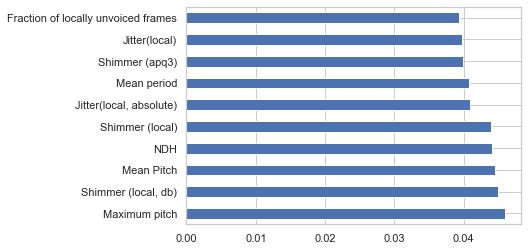

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()

model.fit(os_data_X,os_data_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=os_data_X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

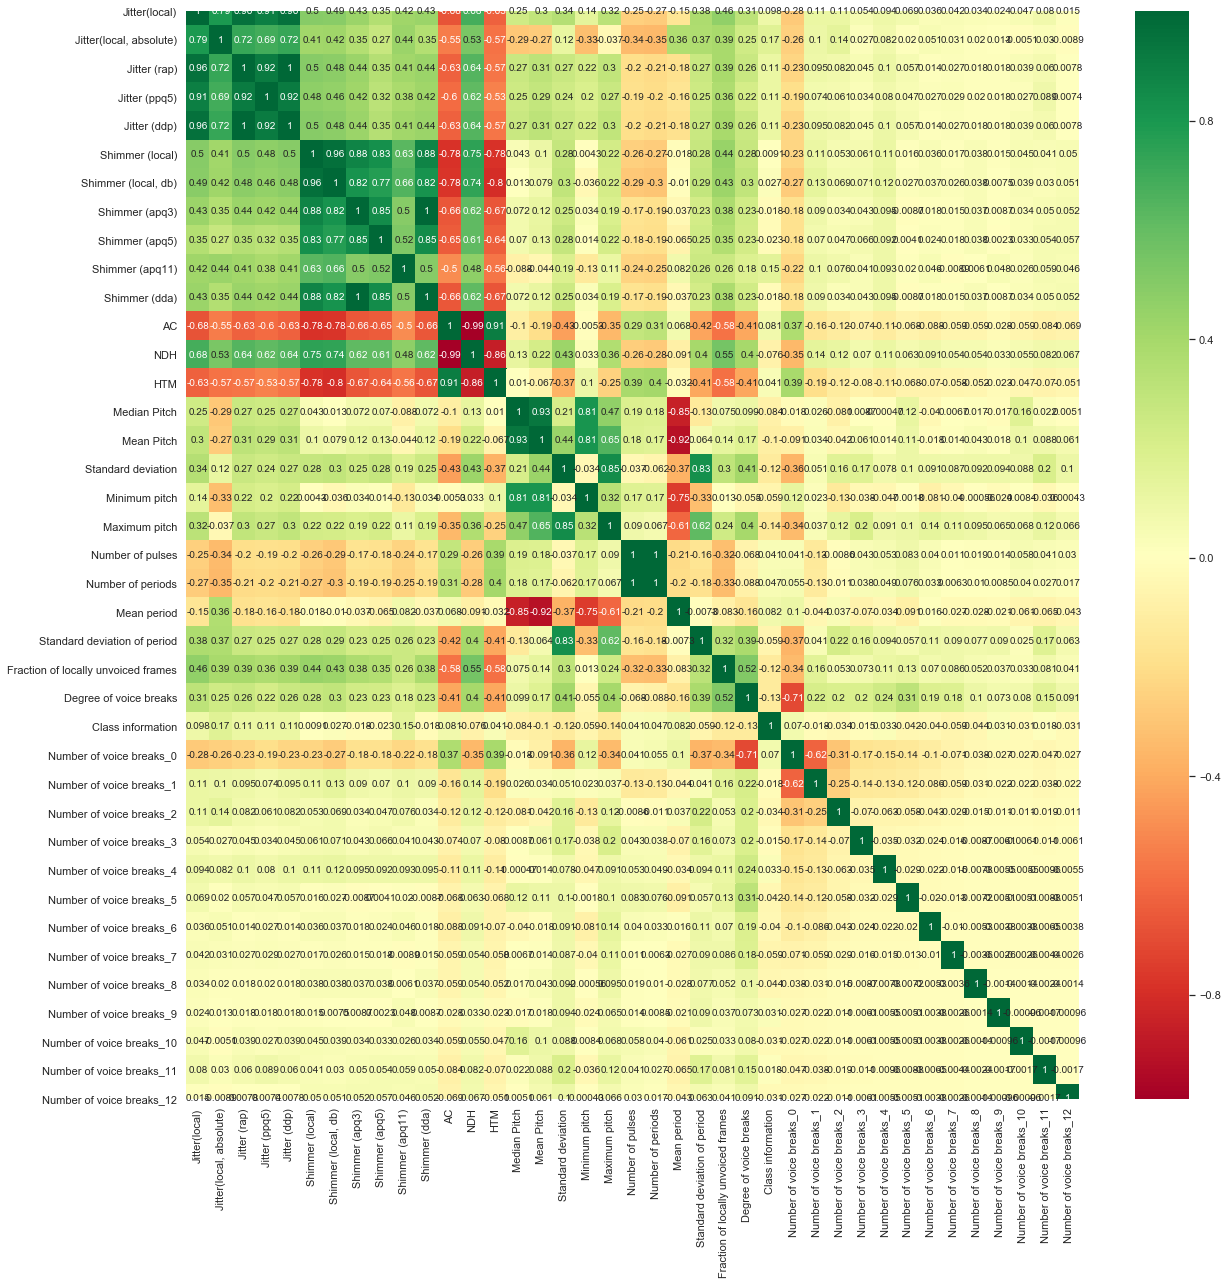

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

#get correlations of each features in dataset
corrmat = data_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['Class information']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=1 )
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
cols=['Jitter(local)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local, db)', 'Shimmer (apq11)', 'AC', 
      'NDH', 'Number of pulses', 'Number of periods', 'Number of voice breaks_0', 'Number of voice breaks_1', 
      'Number of voice breaks_2', 'Number of voice breaks_3', 'Number of voice breaks_4', 'Number of voice breaks_5', 
      'Number of voice breaks_6', 'Number of voice breaks_7', 'Number of voice breaks_10'] 
X=os_data_X[cols]
y=os_data_y['Class information']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())